1.Analyse the data

2.Do exploratory data analysis

3.Do data preprocessing

4.Build models and evaluate the performance

5.Identify the cross validated score

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#surpressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the dataset
df=pd.read_csv("hr_dataset.csv")
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
DF=df.copy()

In [7]:
df.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [8]:
df.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
duplicated_df=df[df.duplicated()]
duplicated_df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df=df.drop_duplicates()
df.shape

(11991, 10)

In [11]:
df=df.reset_index() #since the duplicate rows are dropped. 
df

,index,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
11986,11995,0.90,0.55,3,259,10,1,0,1,management,high
11987,11996,0.74,0.95,5,266,10,0,0,1,management,high
11988,11997,0.85,0.54,3,185,10,0,0,1,management,high
11989,11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [12]:
df=df.drop('index',axis=1)
df.shape

(11991, 10)

In [13]:
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


In [14]:
df.mode()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.74,0.55,4.0,149,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.median()

satisfaction              0.66
evaluation                0.72
number_of_projects        4.00
average_montly_hours    200.00
time_spend_company        3.00
work_accident             0.00
churn                     0.00
promotion                 0.00
dtype: float64

In [16]:
#checking the missing values
df.isnull().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

INSIGHTS:
* The dataset contains 11991 rows and 10 features.
* There is no missing values in the dataset.

# EDA

In [17]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

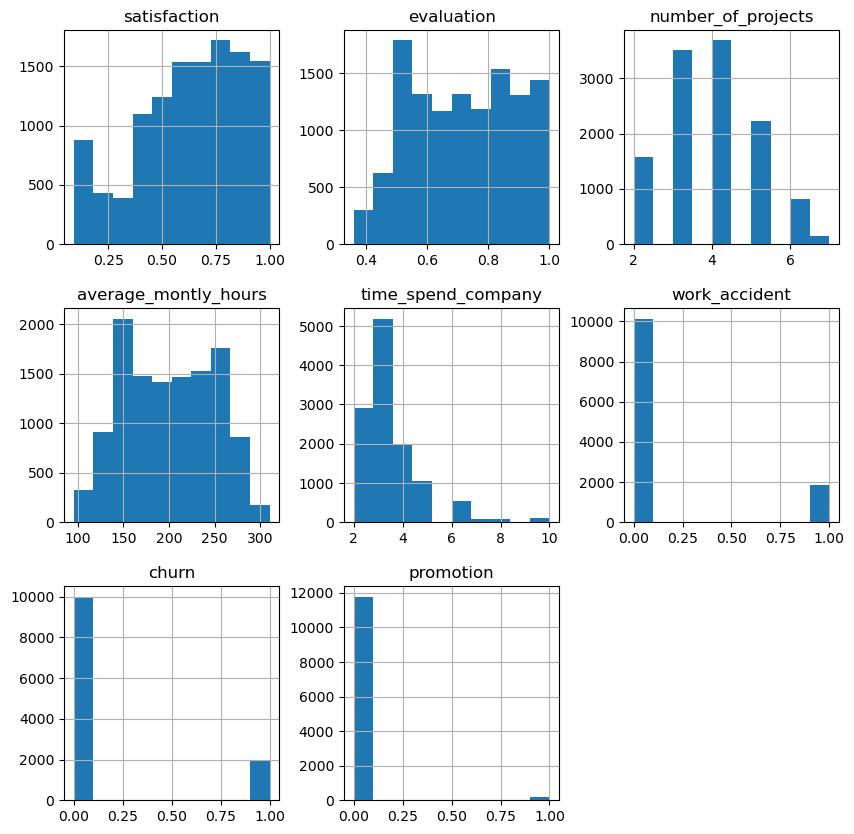

In [18]:
#plotting histograms
df.hist(figsize=(10,10))
plt.show()

(-1.1119843671514598,
 1.1005706850840138,
 -1.1010774463225224,
 1.1104422747770726)

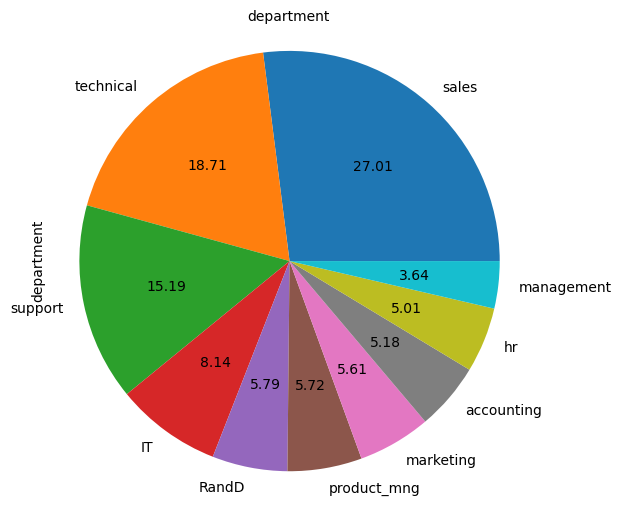

In [19]:
plt.figure(figsize=(6,6))
df['department'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("department",size=10)
plt.axis('equal')

In [20]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

(-1.1231163194257827,
 1.1011007856076884,
 -1.1234061193264628,
 1.116536266617896)

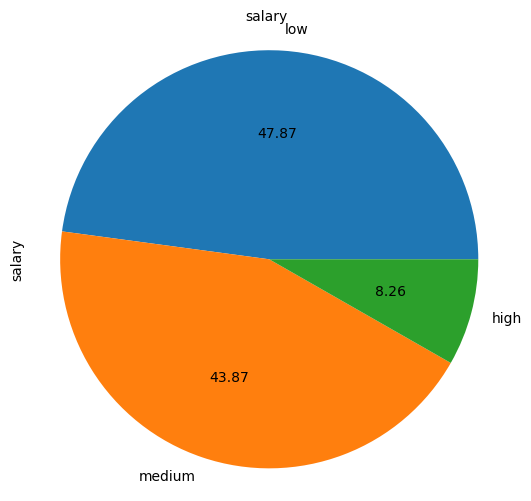

In [21]:
plt.figure(figsize=(6,6))
df['salary'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("salary",size=10)
plt.axis('equal')

In [22]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

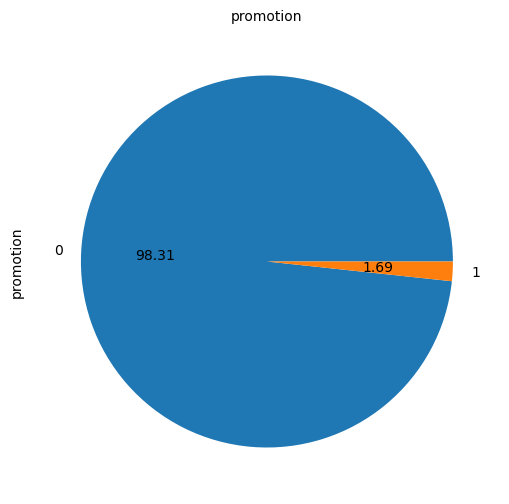

In [23]:
plt.figure(figsize=(6,8))
df['promotion'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('promotion',size=10)
plt.show

In [24]:
df['promotion'].value_counts()

0    11788
1      203
Name: promotion, dtype: int64

INSIGHTS:
* Sales department is having the more no.of employees while the management department is having the less.
* only 8% of the employees are getting high salary.
* 98% of employeesd are not getting any promotions.


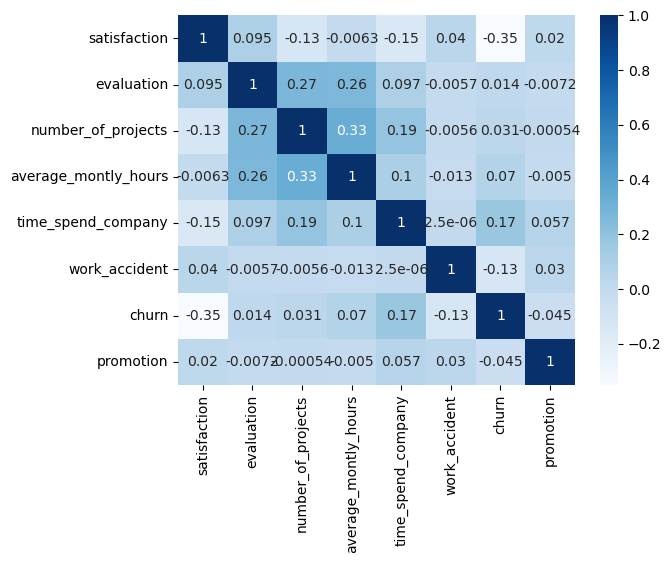

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

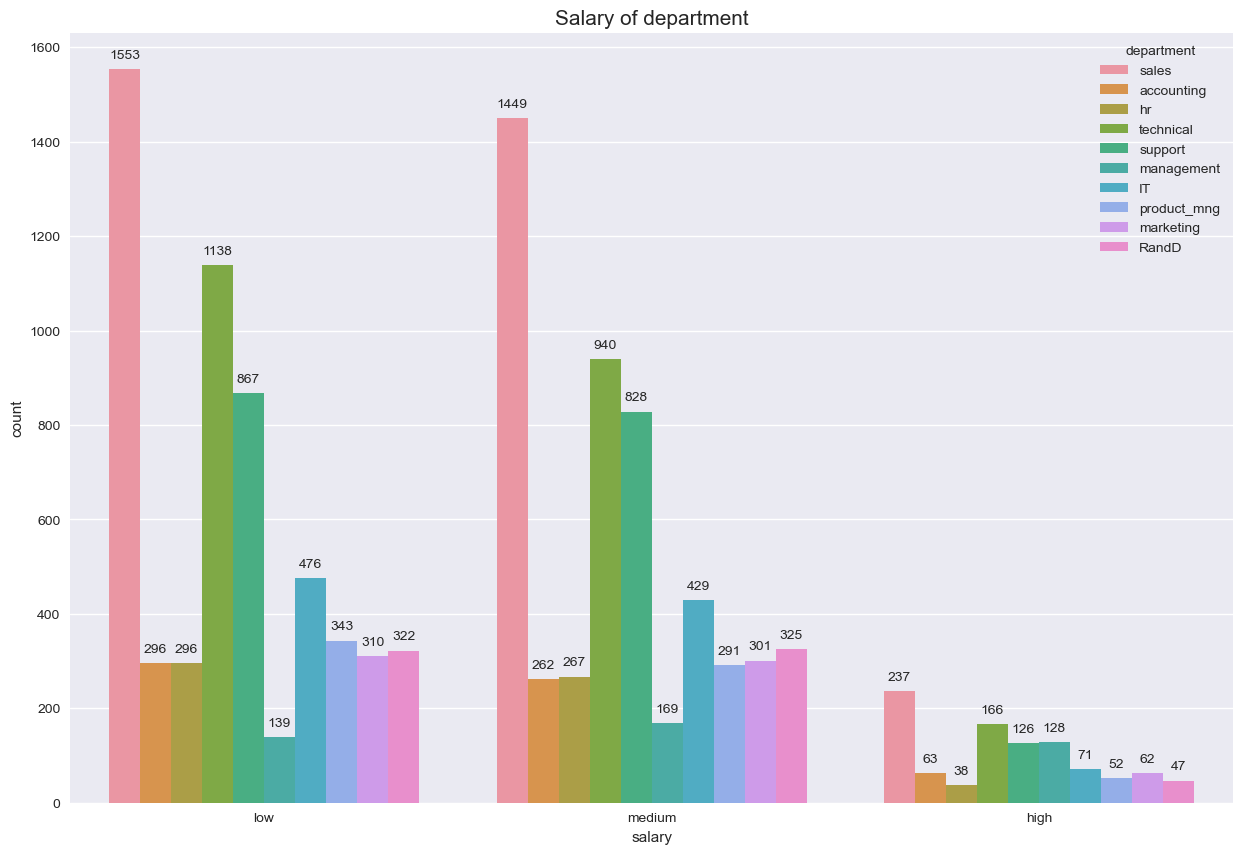

In [26]:
plt.figure(figsize=(15, 10))
plt.style.use("seaborn")
ax = sns.countplot(x="salary",data=df,hue='department')
plt.title("Salary of department",size=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

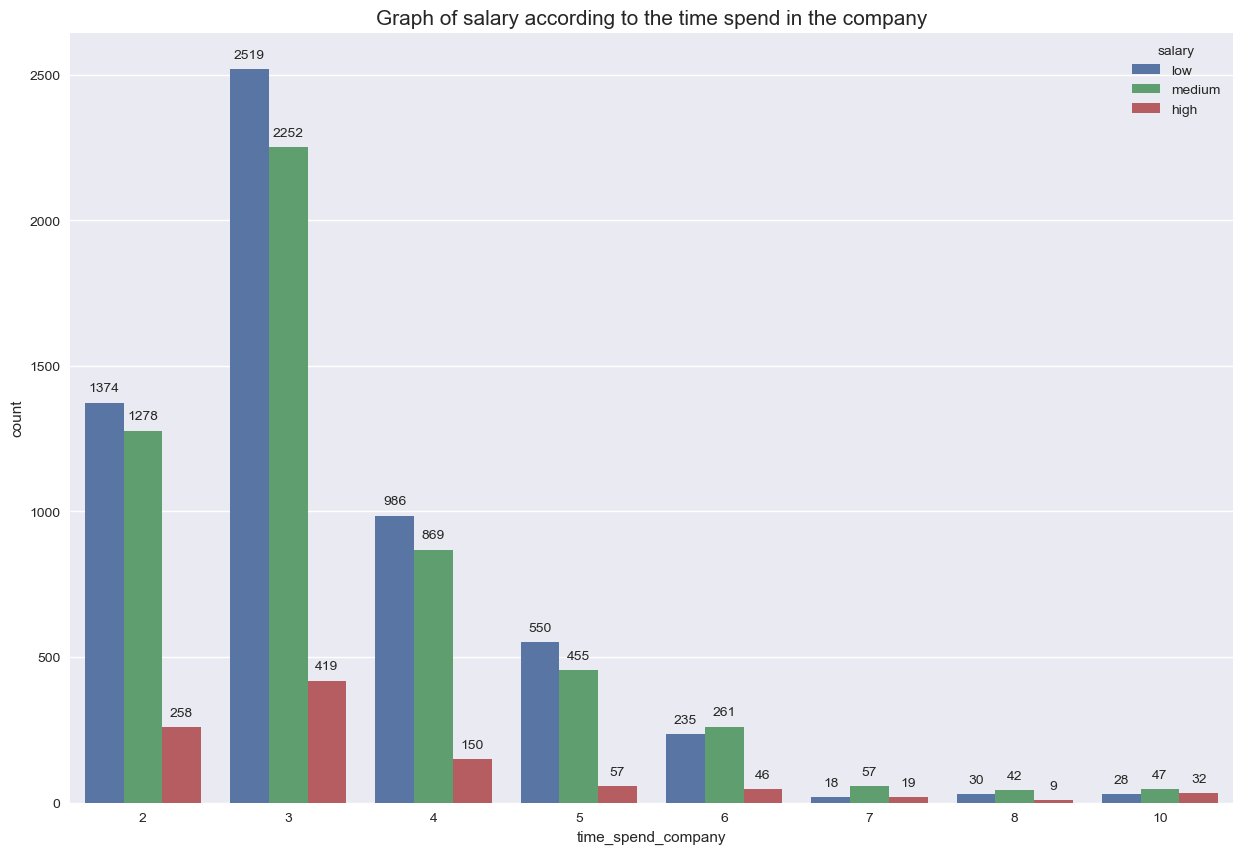

In [27]:
plt.figure(figsize=(15, 10))
plt.style.use("seaborn")
ax = sns.countplot(hue="salary",data=df,x='time_spend_company')
plt.title("Graph of salary according to the time spend in the company",size=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

In [28]:
df['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

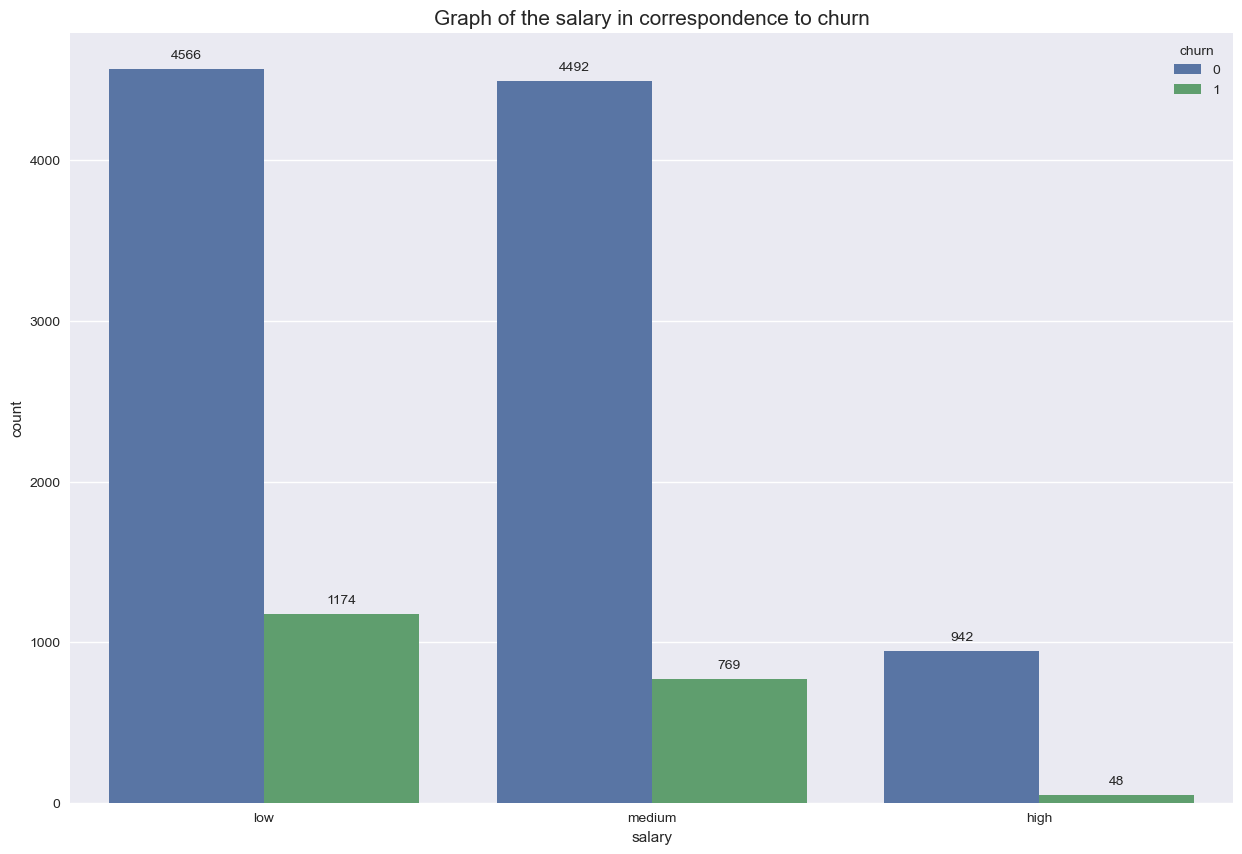

In [29]:
plt.figure(figsize=(15, 10))
plt.style.use("seaborn")
ax = sns.countplot(x="salary",data=df,hue='churn')
plt.title("Graph of the salary in correspondence to churn",size=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

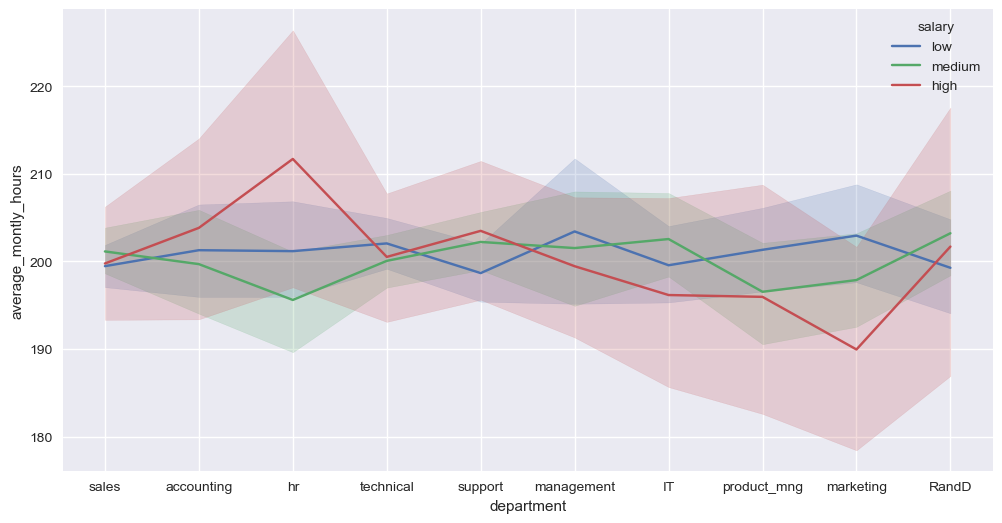

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(x='department', y='average_montly_hours', hue='salary', data= df)
plt.show()

In [31]:
df.groupby(["department",'salary'])['churn'].value_counts()

department   salary  churn
IT           high    0          67
                     1           4
             low     0         389
                     1          87
             medium  0         362
                     1          67
RandD        high    0          44
                     1           3
             low     0         271
                     1          51
             medium  0         294
                     1          31
accounting   high    0          60
                     1           3
             low     0         237
                     1          59
             medium  0         215
                     1          47
hr           high    0          35
                     1           3
             low     0         234
                     1          62
             medium  0         219
                     1          48
management   high    0         127
                     1           1
             low     0         107
                     1      

In [32]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [33]:
df.groupby(["department",'salary'])["average_montly_hours"].mean()

department   salary
IT           high      196.169014
             low       199.569328
             medium    202.564103
RandD        high      201.702128
             low       199.279503
             medium    203.224615
accounting   high      203.841270
             low       201.290541
             medium    199.698473
hr           high      211.710526
             low       201.182432
             medium    195.606742
management   high      199.460938
             low       203.431655
             medium    201.532544
marketing    high      189.951613
             low       202.954839
             medium    197.880399
product_mng  high      195.961538
             low       201.335277
             medium    196.539519
sales        high      199.772152
             low       199.468126
             medium    201.148378
support      high      203.500000
             low       198.675894
             medium    202.233092
technical    high      200.524096
             low       202.0

In [34]:
df.groupby(["department"])['salary'].apply(lambda x: x.mode())

department    
IT           0       low
RandD        0    medium
accounting   0       low
hr           0       low
management   0    medium
marketing    0       low
product_mng  0       low
sales        0       low
support      0       low
technical    0       low
Name: salary, dtype: object

INSIGHT:
* In RandD and management departments most of the employees are getting medium amount of salary.
* While in all other departments most of employees are getting only low amount of salary.

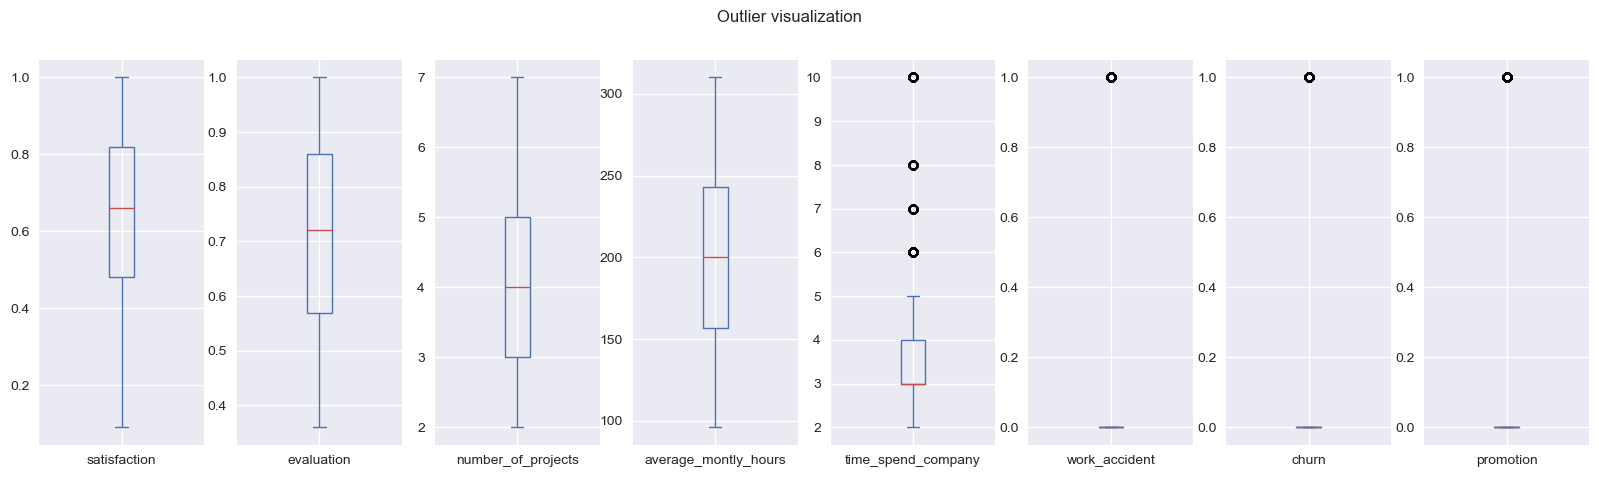

In [35]:
#checking for outliers
df.plot(subplots=True,kind="box",figsize=(20,5),title="Outlier visualization")
plt.show()

# DATA PROCESSING

Outliers are identified in the dataset.

<AxesSubplot:title={'center':'Box Plot of  time_spend_company'}, xlabel='time_spend_company'>

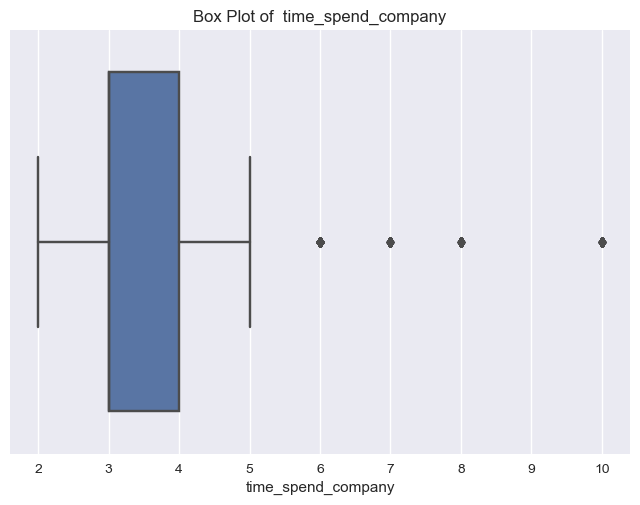

In [36]:
#checking the outlier in time_spend_company
plt.title('Box Plot of  time_spend_company')
sns.boxplot(df['time_spend_company'])

In [37]:
Q1=np.percentile(df['time_spend_company'],25,interpolation='midpoint')
Q3=np.percentile(df['time_spend_company'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l1=[]
for i in df['time_spend_company']:
    if (i>Max)or(i<Min):
        l1.append(i)
len(l1)

1.5 5.5


824

In [38]:
unique_list = list(set(l1))

print(unique_list)

[8, 10, 6, 7]


In [39]:
df.groupby('time_spend_company')['salary','churn'].value_counts()

time_spend_company  salary  churn
2                   low     0        1362
                    medium  0        1259
                    high    0         258
                    medium  1          19
                    low     1          12
3                   low     0        1993
                    medium  0        1927
                    low     1         526
                    high    0         396
                    medium  1         325
                    high    1          23
4                   low     0         690
                    medium  0         681
                    low     1         296
                    medium  1         188
                    high    0         139
                            1          11
5                   low     0         277
                            1         273
                    medium  0         260
                            1         195
                    high    0          43
                            1          14


In [40]:
df['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

Text(0.5, 1.0, 'Box of work_accident ')

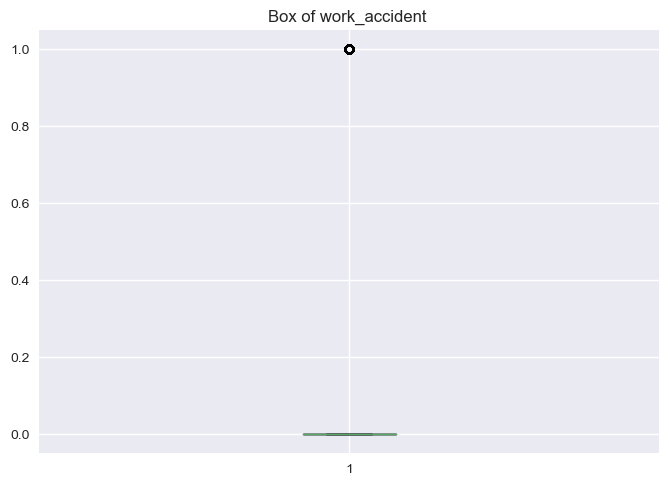

In [41]:
#Handling outliers in work_accident
plt.boxplot(df['work_accident'])
plt.title("Box of work_accident ")


In [42]:
df['work_accident'].value_counts()

0    10141
1     1850
Name: work_accident, dtype: int64

In [43]:
Q1=np.percentile(df['work_accident'],25,interpolation='midpoint')
Q3=np.percentile(df['work_accident'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l2=[]
for i in df['work_accident']:
    if (i>Max)or(i<Min):
        l2.append(i)
len(l2)

0.0 0.0


1850

In [44]:
unique_list2 = list(set(l2))

print(unique_list2)

[1]


Text(0.5, 1.0, 'Box of churn ')

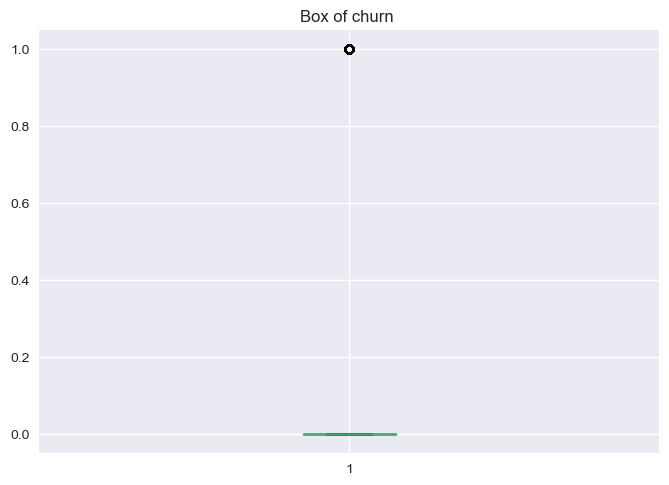

In [45]:
#Handling outliers in churn
plt.boxplot(df['churn'])
plt.title("Box of churn ")


Text(0.5, 1.0, 'Box of promotion ')

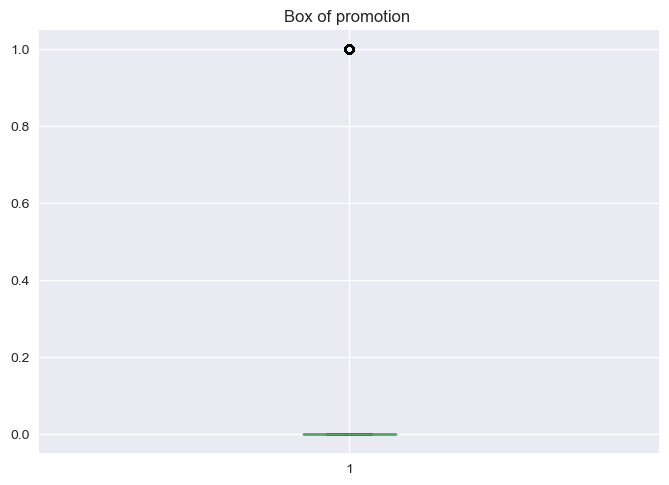

In [46]:
#Handling outliers in promotion
plt.boxplot(df['promotion'])
plt.title("Box of promotion ")


INSIGHTS:
* Since time_spend_company is the no.of years e employee worked in the company. The outliers shown in the graph cannot be considered as mistake. So the outliers are not handling.

INSIGHTS:
 * The chance of churn of an employee is very low if they completed more than 6 years in the company.

INSIGHTS:
* 1 cannot be considered as a outlier. 
* Similarly in the case of churn and promotion

# Encoding

In [47]:
df.department.nunique()

10

In [48]:
dummies=pd.get_dummies(df['department'],drop_first=True)
df=pd.concat([df.drop(['department'],axis=1),dummies],axis=1)
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,high,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,high,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,high,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,high,0,0,0,0,1,0,0,0,0


In [49]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'salary', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical'],
      dtype='object')

# Feature Scaling - StandardScaler

In [50]:
# Splitting dataset into x and y
y = df['salary']
X = df.drop('salary', axis = 1)

In [51]:
X.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [52]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)

In [53]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04,1.199100e+04
mean,7.477965e-16,-1.012022e-15,-2.563184e-16,-2.756207e-16,-2.503576e-15,1.136133e-14,1.791429e-14,3.395758e-15,-2.625148e-16,-1.177896e-15,-2.475938e-15,-5.275809e-15,-9.631030e-16,4.048740e-15,9.541011e-16,-1.169952e-15,-2.853961e-15
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-2.238688e+00,-2.118878e+00,-1.549921e+00,-2.144112e+00,-1.026066e+00,-4.271156e-01,-4.462062e-01,-1.312284e-01,-2.478553e-01,-2.337037e-01,-2.297076e-01,-1.942488e-01,-2.438500e-01,-2.463354e-01,-6.083476e-01,-4.231501e-01,-4.798173e-01
25%,-6.208334e-01,-8.713698e-01,-6.902161e-01,-8.922078e-01,-2.742906e-01,-4.271156e-01,-4.462062e-01,-1.312284e-01,-2.478553e-01,-2.337037e-01,-2.297076e-01,-1.942488e-01,-2.438500e-01,-2.463354e-01,-6.083476e-01,-4.231501e-01,-4.798173e-01
50%,1.258688e-01,1.970759e-02,1.694890e-01,-9.718096e-03,-2.742906e-01,-4.271156e-01,-4.462062e-01,-1.312284e-01,-2.478553e-01,-2.337037e-01,-2.297076e-01,-1.942488e-01,-2.438500e-01,-2.463354e-01,-6.083476e-01,-4.231501e-01,-4.798173e-01
75%,7.896041e-01,8.513798e-01,1.029194e+00,8.727716e-01,4.774851e-01,-4.271156e-01,-4.462062e-01,-1.312284e-01,-2.478553e-01,-2.337037e-01,-2.297076e-01,-1.942488e-01,-2.438500e-01,-2.463354e-01,1.643797e+00,-4.231501e-01,-4.798173e-01
max,1.536306e+00,1.683052e+00,2.748604e+00,2.247814e+00,4.988139e+00,2.341286e+00,2.241116e+00,7.620300e+00,4.034612e+00,4.278923e+00,4.353360e+00,5.148038e+00,4.100882e+00,4.059506e+00,1.643797e+00,2.363227e+00,2.084126e+00


Splitting data into train set and test set

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [55]:
X_train.shape

(9592, 17)

In [56]:
y_train.shape

(9592,)

In [57]:
X_test.shape

(2399, 17)

In [58]:
y_test.shape

(2399,)

# MODELLING

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

              precision    recall  f1-score   support

        high       0.50      0.01      0.02       190
         low       0.49      0.75      0.59      1136
      medium       0.48      0.29      0.36      1073

    accuracy                           0.49      2399
   macro avg       0.49      0.35      0.32      2399
weighted avg       0.49      0.49      0.44      2399



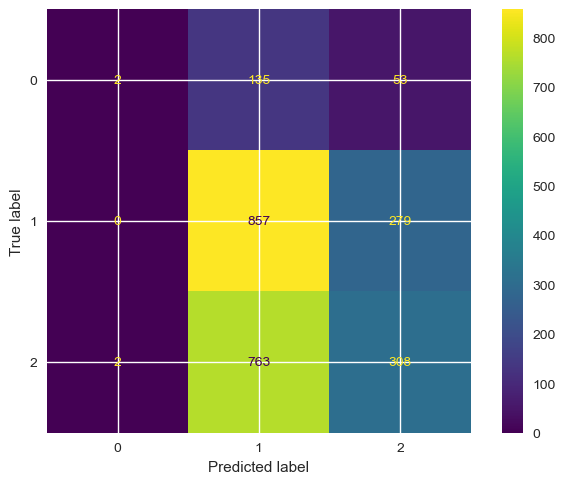

In [60]:
#Logistic Regression
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
print(classification_report(y_test, predictions))

In [61]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [62]:
#model fine tuning
# Identifty the best values for n_neighbors
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_values.append(accuracy_score(y_test, predictions))

In [63]:
acc_values

[0.42976240100041685,
 0.46352646936223424,
 0.46310962901208835,
 0.4756148395164652,
 0.47353063776573573,
 0.46352646936223424,
 0.4601917465610671,
 0.4672780325135473,
 0.460608586911213,
 0.4660275114631096,
 0.46310962901208835,
 0.46936223426427676]

Text(0, 0.5, 'Accuracy')

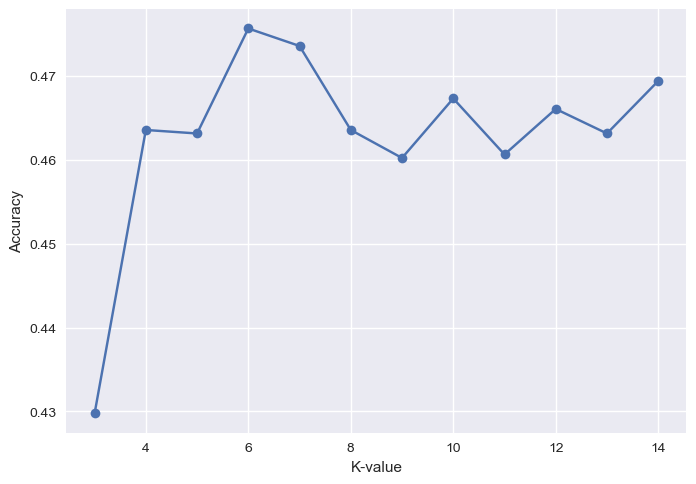

In [64]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

              precision    recall  f1-score   support

        high       0.14      0.04      0.06       190
         low       0.48      0.61      0.54      1136
      medium       0.45      0.38      0.41      1073

    accuracy                           0.46      2399
   macro avg       0.36      0.34      0.34      2399
weighted avg       0.44      0.46      0.44      2399



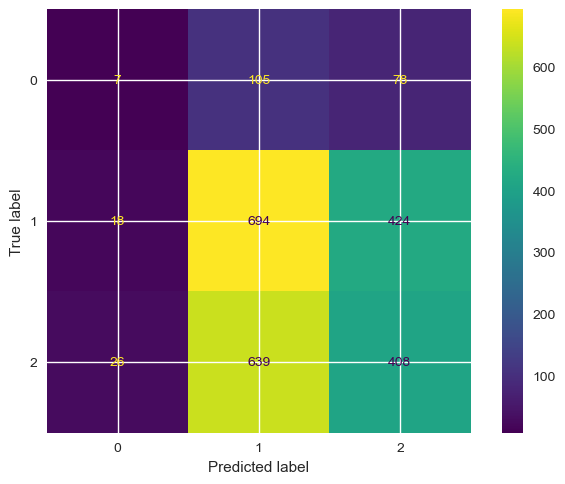

In [65]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=7,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
print(classification_report(y_test, predictions))

INSIGHTS:
* logistic Regression has more accuracy than KNN model.So logistic model is better than KNN.
    

# cross validated score

In [68]:
from sklearn.model_selection import cross_val_score

In [92]:
scores= cross_val_score(lr, X, y, cv=5, scoring='accuracy')

In [93]:
print(scores)

[0.4989579  0.46246872 0.46663887 0.46872394 0.46788991]


In [95]:
average_score=scores.mean()
print(average_score)

0.4729358667306819


INSIGHTS:
* The cross validated score of logistic regression is 0.4729